<a href="https://colab.research.google.com/github/2000noroozi/University-projects/blob/main/Prostate_MRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A) Load an image and segmentation into Python. Overlay the segmented mask onto image so as to display only the region of interest.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import nibabel as nib
file_path = '/content/drive/My Drive/Prostate/ProstateX-0000/ADC.nii.gz'
nifti_data = nib.load(file_path)

nifti_info = {
    "Shape": nifti_data.shape,
    "Type": nifti_data.get_data_dtype(),
    "Affine_matrix": nifti_data.affine,
    "Header": nifti_data.header
}

print("Shape:\n", nifti_info["Shape"])
print("Type:\n", nifti_info["Type"])
print("Affine Matrix:\n", nifti_info["Affine_matrix"])
print("Header:\n", nifti_info["Header"])

image_data = nifti_data.get_fdata()
print("Voxel:\n", image_data)

Mounted at /content/drive
Shape:
 (384, 384, 19)
Type:
 float32
Affine Matrix:
 [[-4.99999613e-01  9.96525923e-05 -3.67326755e-03  5.76854362e+01]
 [ 9.96525923e-05 -4.74188209e-01 -9.51440990e-01  8.23630600e+01]
 [-6.12210832e-04 -1.58573389e-01  2.84512925e+00 -2.70807571e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Header:
 <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 384 384  19   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.        0.5       0.5       3.0000021 0.        0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
ca

It extracts valuable image information such as shape=384x384x19, data type=float32, and the affine matrix, which describes an image's orientation and spatial positioning. The header provides metadata about voxel dimensions: 0.5mm x 0.5mm x 3mm and alignment. Voxel data contains only intensity values.

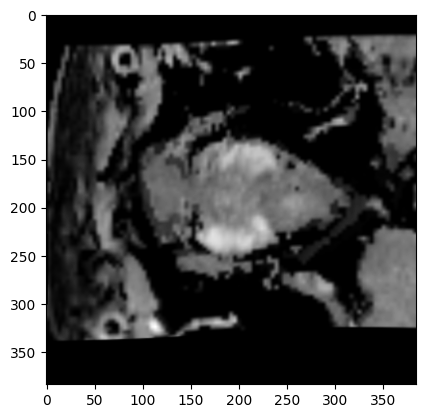

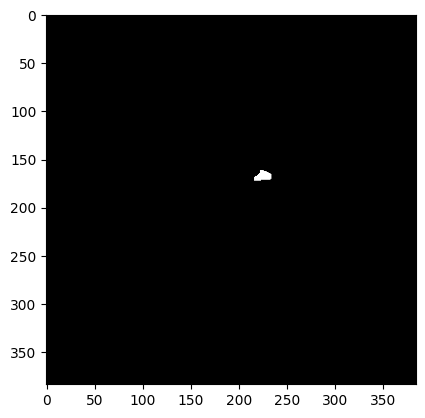

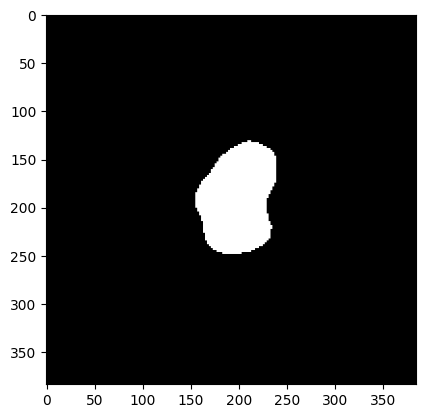

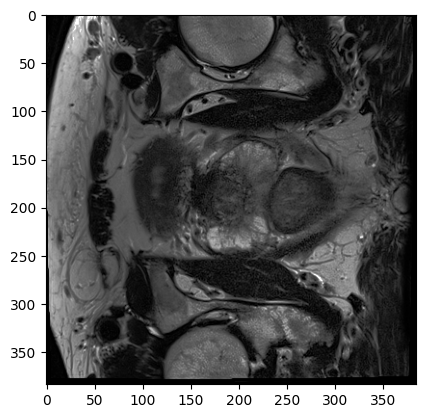

In [2]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import os

folder_path = '/content/drive/My Drive/Prostate/ProstateX-0000/'

for file_name in os.listdir(folder_path):
    if file_name.endswith('.nii.gz'):
        file_path = os.path.join(folder_path, file_name)

        nifti_data = nib.load(file_path)

        image_data = nifti_data.get_fdata()

        slice_index = image_data.shape[2] // 2
        slice_data = image_data[:, :, slice_index]

        slice_data_normalized = (slice_data - np.min(slice_data)) / (np.max(slice_data) - np.min(slice_data)) * 255
        slice_data_normalized = slice_data_normalized.astype(np.uint8)

        output_png_path = os.path.join(folder_path, f"{file_name.replace('.nii.gz', '')}.png")
        imageio.imwrite(output_png_path, slice_data_normalized)

        plt.imshow(slice_data_normalized, cmap='gray')
        plt.show()

It first loads the 3D image data and then extracts a 2D slice. It selects the middle slice of the 3D volume.

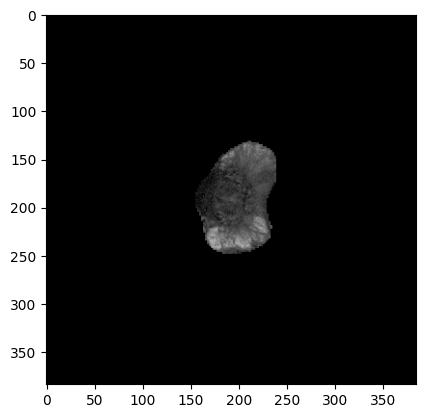

In [3]:
import cv2
import matplotlib.pyplot as plt

original_image_path = '/content/drive/My Drive/Prostate/ProstateX-0000/T2W.png'
mask_image_path = '/content/drive/My Drive/Prostate/ProstateX-0000/PM.png'
output_image_path = '/content/drive/My Drive/Prostate/ProstateX-0000/masked_T2W.png'

original_image = cv2.imread(original_image_path)
mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)

mask_image = np.where(mask_image > 0, 1, 0).astype(np.uint8)

masked_image = cv2.bitwise_and(original_image, original_image, mask=mask_image)

cv2.imwrite(output_image_path, masked_image)

plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.show()

It follows that the mask will be binarized. Then, using this binary mask on the original image by a bitwise AND operation, it keeps only the pixels of the original image corresponding to white areas in the mask and thus extracts the region of interest.

**B) Overlay an outline of the mask on the original image and save it as a PNG.**

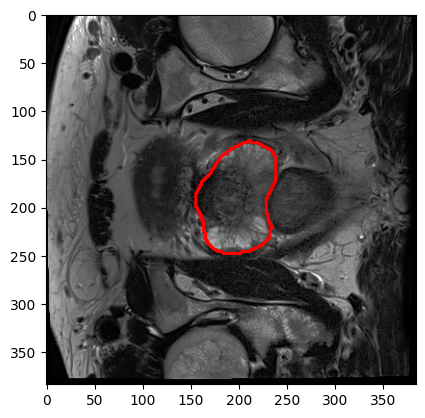

True

In [4]:
contours, _ = cv2.findContours(mask_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(original_image, contours, -1, (0, 0, 255), 2)

original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

plt.imshow(original_image_rgb)
plt.show()

output_image_path = '/content/drive/My Drive/Prostate/ProstateX-0000/ProstateX-0000.png'

cv2.imwrite(output_image_path, original_image)

The function cv2.findContours() takes a mask image as input to find the contours defining object boundaries. These are drawn on the original image in red with cv2.drawContours(). Lastly, the function cv2.cvtColor() changes the image format from BGR to RGB to correctly display it using matplotlib.